# VPN multiclass classification using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: multiclass classification of VPN

Raw data from: ISCX-VPN-2016  [1]

-----------------------------------------------------------------------
[1] Gerard Draper-Gil et al. Characterization of Encrypted and VPN Traffic Using Time-related. In ICISSP, pages 407–414, 2016.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../cnsm_final_datasets/vpn_iscx_multiclass.csv")

In [4]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,...,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL
0,0,134.170.25.26.,10.8.8.178,1,0,0,0,1.433357e+09,1.433357e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,CHAT
1,1,10.8.8.178.,134.170.25.26,1,0,1,0,1.433357e+09,1.433357e+09,54269,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,CHAT
2,2,10.8.8.178.,157.56.52.13,3,0,2,0,1.433357e+09,1.433357e+09,56909,...,-341097.010413,0.608031,0.434314,0.233900,NaN,55.388248,2292.470299,-0.371507,0.007280,CHAT
3,3,157.56.52.13.,10.8.8.178,3,0,4,0,1.433357e+09,1.433357e+09,40011,...,89822.936222,0.094477,0.492656,0.284938,NaN,10.541214,138.490636,0.142047,0.165118,CHAT
4,4,10.8.8.178.,134.170.25.26,1,0,149,0,1.433357e+09,1.433357e+09,54269,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,CHAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23073,23073,74.125.226.56,10.8.8.138,4,3,1751,1673,1.432323e+09,1.432323e+09,443,...,11037.684045,0.006667,0.508077,0.289115,0.004800,1.217957,0.081599,-0.204229,0.991587,FileTrasfer
23074,23074,74.125.226.56.,10.8.8.138,14,0,887,0,1.432323e+09,1.432323e+09,443,...,4779.019623,0.597104,0.569086,0.275657,0.253250,2.251129,29.391239,0.918039,0.116570,FileTrasfer
23075,23075,74.125.226.56.,10.8.8.138,4,0,0,0,1.432323e+09,1.432323e+09,443,...,NaN,0.006667,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,FileTrasfer
23076,23076,10.8.8.138.,74.125.226.56,12,0,289,0,1.432323e+09,1.432323e+09,51142,...,6458.036444,0.044215,0.564764,0.279904,0.207302,2.285338,48.245202,0.917641,0.079507,FileTrasfer


In [5]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "POWER_MEAN",
    "POWER_STD",
    "POWER_MODE",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [6]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        if F in distribution_features:
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in frequency_features: 
            df.replace([np.inf], -1, inplace=True)
            df.replace([-np.inf], -1, inplace=True)
            df.loc[df[F].isnull(), F] = -1
        else:
            df.replace([np.inf], 0, inplace=True)
            df.replace([-np.inf], 0, inplace=True)
            df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [7]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,POWER_MEAN,POWER_STD,POWER_MODE,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,134.170.25.26.,10.8.8.178,1,0,0,0,1.433357e+09,1.433357e+09,443,54269,60,60.0,60.000000,0,0.000000,60.0,60.0,60,60,0,60,100.000000,0,0.000000,60.000000,0.000000,0.000000,0.000000,2.000000,-3.000000,0.000000e+00,-0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.000000,0.000000,0.500000,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,False,0.0,0.000000,60,1.000000,False,0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,False,CHAT,0
1,1,10.8.8.178.,134.170.25.26,1,0,1,0,1.433357e+09,1.433357e+09,54269,443,61,61.0,61.000000,0,0.000000,61.0,61.0,61,61,0,61,100.000000,0,0.000000,61.000000,0.000000,0.000000,0.000000,2.000000,-3.000000,0.000000e+00,-0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,False,0.301030,0.000000,0.000000,0.500000,0.875000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,False,0.0,0.000000,61,1.000000,False,0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.00000,-1.000000,-1.000000,-1.000000e+00,-1.000000,0.006667,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,False,CHAT,0
2,2,10.8.8.178.,157.56.52.13,3,0,2,0,1.433357e+09,1.433357e+09,56909,40011,60,60.0,1.000000,2,-0.967213,60.0,61.0,60,62,2,60,1.666667,0,0.000000,60.673992,0.000000,0.333333,0.000000,120.000000,7262.666667,6.666667e-01,1.632993e+00,1.000000,5.333333,0.918296,0.579380,0.535744,False,0.477121,0.000000,0.000000,0.340934,0.750000,7.299830,0.488201,0.000000,21.411289,21.411289,10.705644,10.705644,0.488201,20.923088,0.511667,False,1.000000,False,0.0,0.000000,182,1.000000,False,0,0.000000,-671.921077,47.390194,0.979537,0.608031,0.855600,9.630094,1.00000,4278.000802,-1.000000,2.382317e+07,-341097.010413,0.608031,0.434314,0.233900,-1.000000,55.388248,2292.470299,-0.371507,True,CHAT,0
3,3,157.56.52.13.,10.8.8.178,3,0,4,0,1.433357e+09,1.433357e+09,40011,56909,61,62.0,1.000000,1,-0.967742,61.0,62.0,60,62,2,62,1.639344,1,1.639344,61.340579,0.333333,0.666667,-1.000000,121.000000,3721.333333,3.333333e-01,8.164966e-01,1.000000,1.000000,0.918296,0.579380,0.535744,False,0.477121,0.000000,0.000000,0.336774,0.750000,7.119728,0.218230,0.000000,21.140954,21.140954,10.570477,10.570477,0.218230,20.922724,0.505215,False,1.000000,False,0.0,0.000000,184,1.000000,False,0,0.000000,-1.349542,10.273650,0.189440,0.331487,0.974617,0.250358,1.00000,4873.086578,-1.000000,3.265305e+06,89822.936222,0.094477,0.492656,0.284938,-1.000000,10.541214,138.490636,0.142047,True,CHAT,0
4,4,10.8.8.178.,134.170.25.26,1,0,149,0,1.433357e+09,1.433357e+09,54269,443,209,209.0,209.000000,0,0.000000,209.0,209.0,209,209,0,209,100.000000,0

In [8]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
0,CHAT,0
117,EMAIL,1
3626,FileTrasfer,2
22318,P2P,3
15686,STREAMING,4
578,VOIP,5


In [9]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['CHAT', 'EMAIL', 'FileTrasfer', 'P2P', 'STREAMING', 'VOIP']

In [10]:
df = df[["LABEL_code"] + features].copy()

In [11]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [12]:
df.shape

(23078, 77)

In [13]:
df_validation = df.sample(n = 3000)
df_features =  df[~df.isin(df_validation)].dropna()

In [14]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [15]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [16]:
y_train.value_counts()

5.0    8691
0.0    2766
2.0    1049
4.0     843
3.0     430
1.0     275
Name: LABEL_code, dtype: int64

In [17]:
y_test.value_counts()

5.0    3726
0.0    1186
2.0     449
4.0     361
3.0     184
1.0     118
Name: LABEL_code, dtype: int64

In [18]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 20, 3),
        'gamma': hp.uniform ('gamma', 1,10),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,5),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 450, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [19]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [03:25<00:00,  2.05s/trial, best loss: -0.9381500885062855]
The best hyperparameters are :  

{'colsample_bytree': 0.7881772277371246, 'gamma': 4.777740484357047, 'max_depth': 21.0, 'min_child_weight': 20.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.3223649294186349}


In [20]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

        CHAT     0.9011    0.9216    0.9112      1186
       EMAIL     0.9175    0.7542    0.8279       118
 FileTrasfer     0.8033    0.7639    0.7831       449
         P2P     0.9474    0.8804    0.9127       184
   STREAMING     0.8871    0.9141    0.9004       361
        VOIP     0.9698    0.9745    0.9722      3726

    accuracy                         0.9376      6024
   macro avg     0.9044    0.8681    0.8846      6024
weighted avg     0.9372    0.9376    0.9371      6024



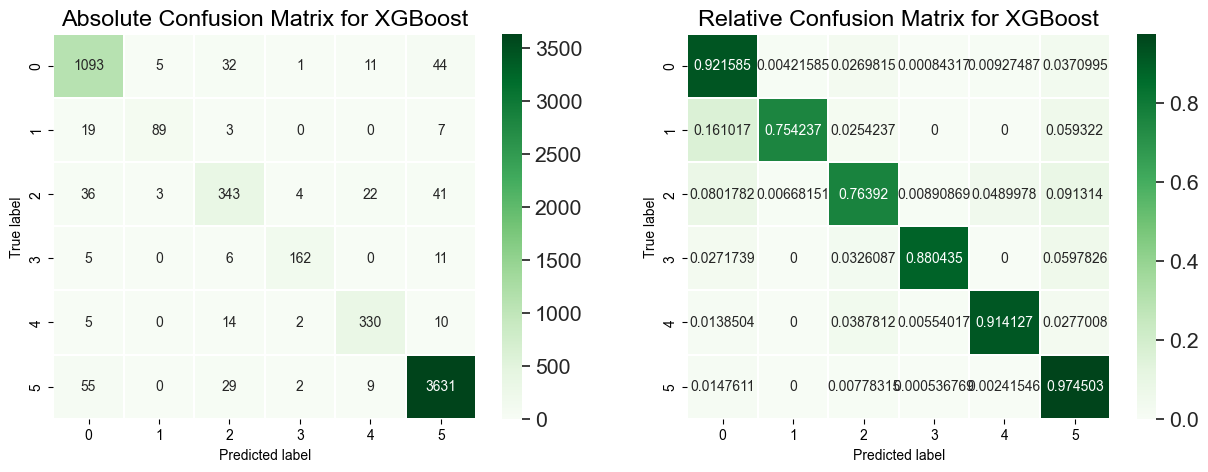

In [21]:
model = XGBoost_classification_tunned_old(best_hyperparams, X_train, X_test, y_train, y_test)

In [22]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='weighted')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [23]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=25)

24
              precision    recall  f1-score   support

        CHAT     0.9259    0.9275    0.9267      1186
       EMAIL     0.9510    0.8220    0.8818       118
 FileTrasfer     0.8377    0.7817    0.8088       449
         P2P     0.9309    0.9511    0.9409       184
   STREAMING     0.8816    0.9280    0.9042       361
        VOIP     0.9736    0.9791    0.9763      3726

    accuracy                         0.9472      6024
   macro avg     0.9168    0.8982    0.9064      6024
weighted avg     0.9468    0.9472    0.9468      6024



## Evaluation of model

              precision    recall  f1-score   support

        CHAT     0.9252    0.9252    0.9252       615
       EMAIL     0.9365    0.8676    0.9008        68
 FileTrasfer     0.7937    0.7468    0.7696       237
         P2P     0.9684    0.9293    0.9485        99
   STREAMING     0.8525    0.8966    0.8739       174
        VOIP     0.9714    0.9790    0.9752      1807

    accuracy                         0.9407      3000
   macro avg     0.9080    0.8908    0.8989      3000
weighted avg     0.9401    0.9407    0.9403      3000



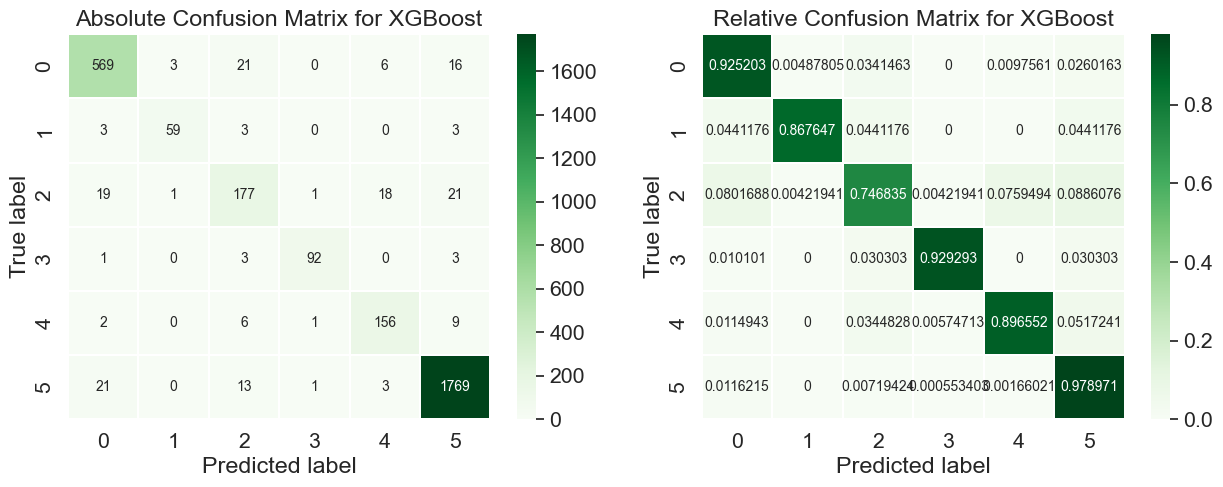

In [29]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
print(report)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

In [30]:
import csv

problem = "VPN-ISCX-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

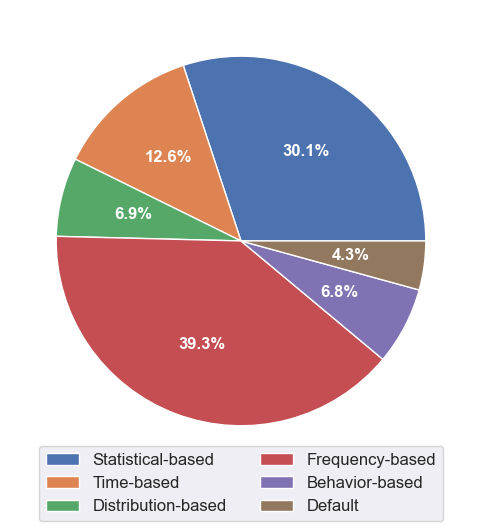

In [31]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()
f_def = feat_importances[default_faetures].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf, f_def]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", "Default"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [32]:
data

[0.3005709, 0.1264793, 0.06897452, 0.3933004, 0.067946374, 0.042728353]

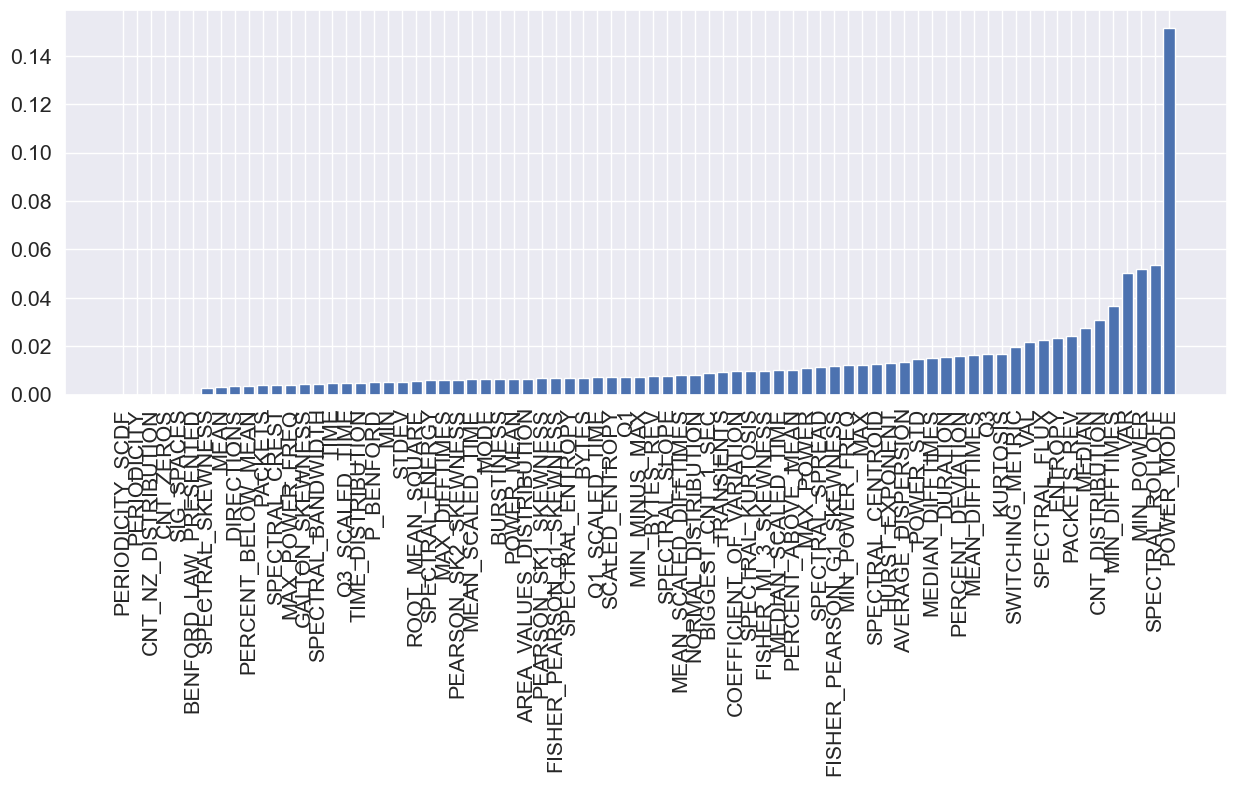

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [34]:
feat_importances

PERIODICITY_SCDF       0.000000
PERIODICITY            0.000000
CNT_NZ_DISTRIBUTION    0.000000
CNT_ZEROS              0.000000
SIG_SPACES             0.000000
                         ...   
MIN_DIFFTIMES          0.036627
VAR                    0.050067
MIN_POWER              0.051801
SPECTRAL_ROLLOFF       0.053550
POWER_MODE             0.151434
Length: 76, dtype: float32

In [35]:
feat_importances.to_dict()

{'PERIODICITY_SCDF': 0.0,
 'PERIODICITY': 0.0,
 'CNT_NZ_DISTRIBUTION': 0.0,
 'CNT_ZEROS': 0.0,
 'SIG_SPACES': 0.0,
 'BENFORD_LAW_PRESENTED': 0.0,
 'SPECTRAL_SKEWNESS': 0.002634631935507059,
 'MEAN': 0.0032892378512769938,
 'DIRECTIONS': 0.003481148276478052,
 'PERCENT_BELOW_MEAN': 0.0036691497080028057,
 'PACKETS': 0.004005896858870983,
 'SPECTRAL_CREST': 0.00403002230450511,
 'MAX_POWER_FREQ': 0.004030315205454826,
 'GALTON_SKEWNESS': 0.004491055384278297,
 'SPECTRAL_BANDWIDTH': 0.0045867799781262875,
 'TIME': 0.004690993577241898,
 'Q3_SCALED_TIME': 0.00479487981647253,
 'TIME_DISTRIBUTION': 0.005004911683499813,
 'P_BENFORD': 0.005060912109911442,
 'MIN': 0.005174332298338413,
 'STDEV': 0.0053658438846468925,
 'ROOT_MEAN_SQUARE': 0.0056589520536363125,
 'SPECTRAL_ENERGY': 0.005867436528205872,
 'MAX_DIFFTIMES': 0.006026970688253641,
 'PEARSON_SK2_SKEWNESS': 0.0060988483019173145,
 'MEAN_SCALED_TIME': 0.0063852714374661446,
 'MODE': 0.006518321577459574,
 'BURSTINESS': 0.006520315539

# FEATURE SELECTION

In [38]:
def perform_val(selected_features, cycles = 25, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features, selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [39]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [02:14<00:00,  1.35s/trial, best loss: -0.9303991632875537]
The best hyperparameters are :  

{'colsample_bytree': 0.11979390452599004, 'gamma': 1.3691682126255973, 'max_depth': 21.0, 'min_child_weight': 3.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.5164713433115986}
0.8794369802640195
100%|██████████| 100/100 [01:54<00:00,  1.14s/trial, best loss: -0.9467427079073832]
The best hyperparameters are :  

{'colsample_bytree': 0.3552121530556301, 'gamma': 1.0336725090167898, 'max_depth': 18.0, 'min_child_weight': 6.0, 'n_estimators': 150.0, 'reg_alpha': 0.0, 'reg_lambda': 0.07830505923788728}
0.8965068105155064
100%|██████████| 100/100 [02:21<00:00,  1.42s/trial, best loss: -0.9382727973051201]
The best hyperparameters are :  

{'colsample_bytree': 0.4374148477063704, 'gamma': 1.49700079783369, 'max_depth': 21.0, 'min_child_weight': 5.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.306473651591038}
0.8897691166332612
100%|██████████| 100

In [40]:
problem = "VPN-ISCX-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])